In [56]:
import json
import time

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

In [57]:
df = pd.read_csv("full_features_clean_health_care_charities.csv")

In [58]:
df_copy = pd.DataFrame(df)

In [59]:
df.head()

,Unnamed: 0,BN/Registration number,Reporting Period List,0.Total Compensation,0.Salary,0.Ongoing Programs,0.Revenue,0.Expenses,1.Total Compensation,1.Salary,...,0.Total Expenses,1.Total Expenses,2.Total Expenses,3.Total Expenses,4.Total Expenses,0.Reporting Date,1.Reporting Date,2.Reporting Date,3.Reporting Date,4.Reporting Date
0,0,858665102RR0001,2022-03-31\n2021-03-31\n2020-03-31\n2019-03-31...,{'Total compensation for all positions': 27397...,"{'$1 to $39,999': '5', '$40,000 to $79,999': '1'}",Ongoing programs: \n\t\n\tOFFRIR DES SERVICES ...,"{'Receipted donations': 1615.0, 'Non-receipted...","{'Charitable programs': 264111.0, 'Management ...",{'Total compensation for all positions': 25070...,"{'$1 to $39,999': '4', '$40,000 to $79,999': '1'}",...,351871.0,335172.0,346487.0,276201.0,308031.0,2022-03-31,2021-03-31,2020-03-31,2019-03-31,2018-03-31
1,5,108035544RR0001,2022-03-31\n2021-03-31\n2020-03-31\n2019-03-31...,{'Total compensation for all positions': 76152...,"{'$40,000 to $79,999': '3', '$80,000 to $119,9...",Ongoing programs: \n\t\n\t1. Mental Health Pro...,"{'Receipted donations': 0.0, 'Non-receipted do...","{'Charitable programs': 8195848.0, 'Management...",{'Total compensation for all positions': 71300...,"{'$40,000 to $79,999': '6', '$80,000 to $119,9...",...,9642174.0,10031019.0,19079245.0,11724194.0,10995088.0,2022-03-31,2021-03-31,2020-03-31,2019-03-31,2018-03-31
2,10,803557529RR0001,2022-03-31\n2021-03-31,{'Total compensation for all positions': 19032...,"{'$1 to $39,999': '2', '$40,000 to $79,999': '5'}",Ongoing programs: \n\t\n\tNous offrons un serv...,"{'Receipted donations': 3618.0, 'Non-receipted...","{'Charitable programs': 172987.0, 'Management ...",{'Total compensation for all positions': 13411...,"{'$1 to $39,999': '4', '$40,000 to $79,999': '1'}",...,268994.0,216811.0,NaN,NaN,NaN,2022-03-31,2021-03-31,NaN,NaN,NaN
3,12,896147386RR0001,2021-03-31\n2020-03-31\n2019-03-31\n2018-03-31...,{'Total compensation for all positions': 38067...,{},Ongoing programs: \n\t\n\tPROGRAMMES D'ÉDUCATI...,"{'Receipted donations': 1000.0, 'Non-receipted...","{'Charitable programs': 0.0, 'Management and a...",{'Total compensation for all positions': 45458...,"{'$40,000 to $79,999': '6'}",...,512969.0,597377.0,539406.0,512406.0,496761.0,2021-03-31,2020-03-31,2019-03-31,2018-03-31,2017-03-31
4,17,739774727RR0001,2021-05-31\n2020-05-31\n2019-05-31\n2018-05-31,{'Total compensation for all positions': 12914...,"{'$1 to $39,999': '2'}",Ongoing programs: \n\t\n\tÉquitation thérapeut...,"{'Receipted donations': 3404.0, 'Non-receipted...","{'Charitable programs': 3028.0, 'Management an...","{'Total compensation for all positions': nan, ...",{},...,27300.0,7267.0,9633.0,3055.0,NaN,2021-05-31,2020-05-31,2019-05-31,2018-05-31,NaN


In [60]:
df.columns

Index(['Unnamed: 0', 'BN/Registration number', 'Reporting Period List',
       '0.Total Compensation', '0.Salary', '0.Ongoing Programs', '0.Revenue',
       '0.Expenses', '1.Total Compensation', '1.Salary', '1.Ongoing Programs',
       '1.Revenue', '1.Expenses', '2.Total Compensation', '2.Salary',
       '2.Ongoing Programs', '2.Revenue', '2.Expenses', '3.Total Compensation',
       '3.Salary', '3.Ongoing Programs', '3.Revenue', '3.Expenses',
       '4.Total Compensation', '4.Salary', '4.Ongoing Programs', '4.Revenue',
       '4.Expenses', '_id.$oid', '0.SalaryArray', '1.SalaryArray',
       '2.SalaryArray', '3.SalaryArray', '4.SalaryArray',
       '0.Total Compensation Value', '0.Full Time Employees',
       '0.Part Time Employees', '0.Consulting Fees',
       '1.Total Compensation Value', '1.Full Time Employees',
       '1.Part Time Employees', '1.Consulting Fees',
       '2.Total Compensation Value', '2.Full Time Employees',
       '2.Part Time Employees', '2.Consulting Fees',
     

In [61]:
df["0.Total Revenue"]

0          361448.0
1         9925154.0
2          358886.0
3          586068.0
4           36339.0
           ...     
6145       605911.0
6146      1119622.0
6147      4065781.0
6148       135567.0
6149    329580631.0
Name: 0.Total Revenue, Length: 6150, dtype: float64

<AxesSubplot: xlabel='0.Total Revenue', ylabel='0.Full Time Employees'>

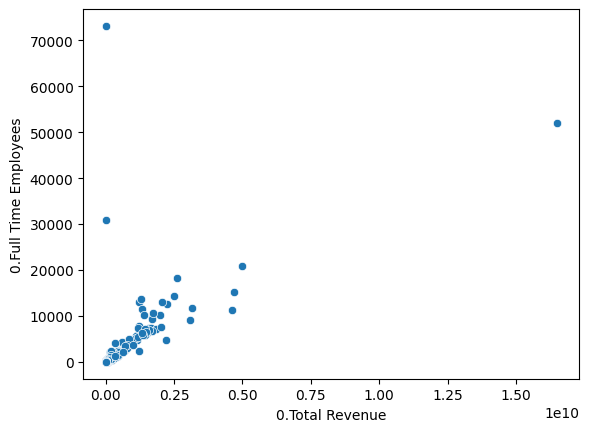

In [62]:
# Outliers
#   1: Diabete Estrie: Wrote down the total compensation value for their full-time employees, total comp = 30992$
#   2: Alberta Health Services: They have a huge amount of govn. funding, nearly 16 billion
#   3: The Helm Center Society: Wrote down the total compensation value for their full-time employees, total comp =
sns.scatterplot(data=df, x="0.Total Revenue", y="0.Full Time Employees")

<AxesSubplot: xlabel='0.Total Revenue', ylabel='0.Total Expenses'>

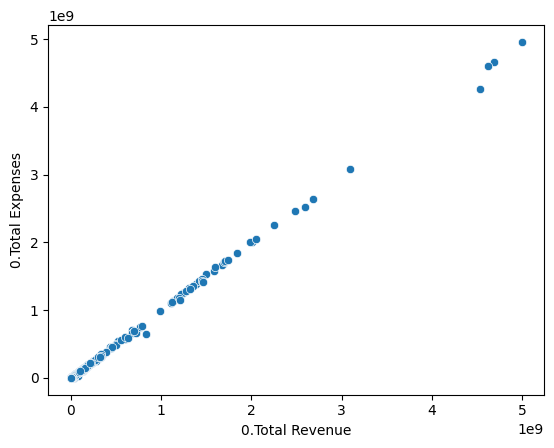

In [63]:
no_outlier_df = df[df["BN/Registration number"] != "124072513RR0010"]
sns.scatterplot(data=no_outlier_df, x="0.Total Revenue", y="0.Total Expenses")

<AxesSubplot: xlabel='0.Total Revenue', ylabel='0.Total Compensation Value'>

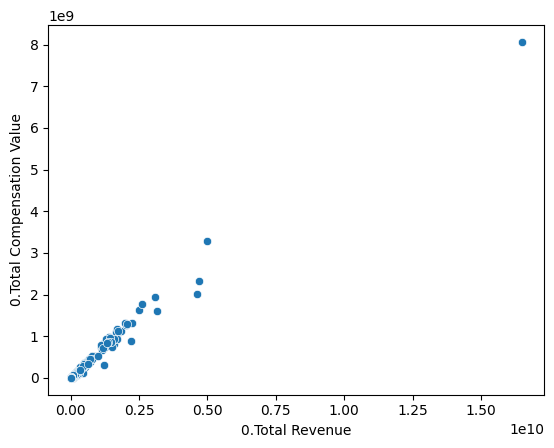

In [64]:
sns.scatterplot(data=df, x="0.Total Revenue", y="0.Total Compensation Value")

In [116]:
# Experimental Feature Creation on df copy
df_copy["0.All Employees"] = df_copy["0.Full Time Employees"] + df_copy["0.Part Time Employees"] 
df_copy["0.Average Salary"] = df_copy["0.Total Compensation Value"] / df_copy["0.All Employees"]
df_copy["0.Percent Revenue to Compensation"] = (df_copy["0.Total Compensation Value"] / df_copy["0.Total Revenue"]) * 100
df_copy["0.Ratio Revenue to Compensation"] = df_copy["0.Total Compensation Value"] / df_copy["0.Total Revenue"]

In [66]:
df_copy["0.Total Compensation Value"].isna().sum()

2903

In [67]:
df_copy["0.Full Time Employees"].isna().sum()

3238

In [68]:
df_copy[df_copy["0.Average Salary"] > 150000]

,Unnamed: 0,BN/Registration number,Reporting Period List,0.Total Compensation,0.Salary,0.Ongoing Programs,0.Revenue,0.Expenses,1.Total Compensation,1.Salary,...,2.Total Expenses,3.Total Expenses,4.Total Expenses,0.Reporting Date,1.Reporting Date,2.Reporting Date,3.Reporting Date,4.Reporting Date,0.All Employees,0.Average Salary
5053,24018,139029839RR0001,2021-03-31\n2020-03-31\n2019-03-31\n2018-03-31...,{'Total compensation for all positions': 58343...,"{'$80,000 to $119,999': '2', '$120,000 to $159...",Ongoing programs: \n\t\n\tPROVIDE OVERSIGHT AN...,"{'Receipted donations': 0.0, 'Non-receipted do...","{'Charitable programs': 0.0, 'Management and a...",{'Total compensation for all positions': 44571...,"{'$80,000 to $119,999': '1', '$120,000 to $159...",...,11172312.0,NaN,7796851.0,2021-03-31,2020-03-31,2019-03-31,2018-03-31,2017-03-31,22.0,2.651966e+05
5137,24435,136029881RR0001,2021-12-31\n2020-12-31\n2019-12-31\n2018-12-31...,{'Total compensation for all positions': 17681...,{},Ongoing programs: \n\t\n\tSADD Alberta provide...,"{'Receipted donations': 0.0, 'Non-receipted do...","{'Charitable programs': 35037.0, 'Management a...",{'Total compensation for all positions': 26234...,{},...,70761.0,87065.0,185769.0,2021-12-31,2020-12-31,2019-12-31,2018-12-31,2017-12-31,0.0,inf
5605,26637,118964063RR0001,2021-03-31\n2020-03-31\n2019-03-31\n2018-03-31...,{'Total compensation for all positions': 18300...,"{'$80,000 to $119,999': '5', '$120,000 to $159...",Ongoing programs: \n\t\n\tWE OPERATE A COMPLEX...,"{'Receipted donations': 44504.0, 'Non-receipte...","{'Charitable programs': 23333658.0, 'Managemen...",{'Total compensation for all positions': 16303...,"{'$80,000 to $119,999': '7', '$120,000 to $159...",...,21441477.0,21069431.0,21320761.0,2021-03-31,2020-03-31,2019-03-31,2018-03-31,2017-03-31,106.0,1.726452e+05


<AxesSubplot: xlabel='0.Total Revenue', ylabel='0.Average Salary'>

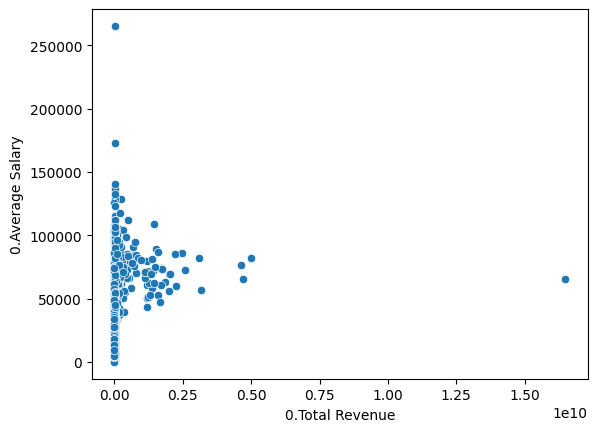

In [69]:
sns.scatterplot(data=df_copy, x="0.Total Revenue", y="0.Average Salary")

In [70]:
df[df["0.Full Time Employees"] > 25000]

,Unnamed: 0,BN/Registration number,Reporting Period List,0.Total Compensation,0.Salary,0.Ongoing Programs,0.Revenue,0.Expenses,1.Total Compensation,1.Salary,...,2.Total Expenses,3.Total Expenses,4.Total Expenses,0.Reporting Date,1.Reporting Date,2.Reporting Date,3.Reporting Date,4.Reporting Date,0.All Employees,0.Average Salary
72,309,124072513RR0010,2021-03-31\n2020-03-31\n2019-03-31\n2018-03-31...,{'Total compensation for all positions': 80632...,"{'$350,000 and over': '10'}",Ongoing programs: \n\t\n\tALBERTA HEALTH SERVI...,"{'Receipted donations': 331000.0, 'Non-receipt...","{'Charitable programs': 15924771000.0, 'Manage...",{'Total compensation for all positions': 78240...,"{'$350,000 and over': '10'}",...,1.518363e+10,1.463776e+10,1.426631e+10,2021-03-31,2020-03-31,2019-03-31,2018-03-31,2017-03-31,123081.0,65511.703675
1851,8831,133583054RR0001,2021-08-31\n2020-08-31\n2019-08-31\n2018-08-31...,{'Total compensation for all positions': 30922...,"{'$1 to $39,999': '1'}",Ongoing programs: \n\t\n\tMAINTIEN D'UN CENTRE...,"{'Receipted donations': 5399.0, 'Non-receipted...","{'Charitable programs': 67286.0, 'Management a...",{'Total compensation for all positions': 49698...,"{'$1 to $39,999': '2'}",...,1.354590e+05,1.521310e+05,1.525370e+05,2021-08-31,2020-08-31,2019-08-31,2018-08-31,2017-08-31,NaN,NaN
5526,26249,702947714RR0001,2021-12-31\n2020-12-31,{'Total compensation for all positions': 73125...,"{'$1 to $39,999': '3'}",Ongoing programs:,"{'Receipted donations': 397076.0, 'Non-receipt...","{'Charitable programs': 196933.0, 'Management ...",{'Total compensation for all positions': 67000...,"{'$1 to $39,999': '2'}",...,NaN,NaN,NaN,2021-12-31,2020-12-31,NaN,NaN,NaN,73128.0,0.999959


In [71]:
df_copy[df_copy["BN/Registration number"] == "118964063RR0001"]

,Unnamed: 0,BN/Registration number,Reporting Period List,0.Total Compensation,0.Salary,0.Ongoing Programs,0.Revenue,0.Expenses,1.Total Compensation,1.Salary,...,2.Total Expenses,3.Total Expenses,4.Total Expenses,0.Reporting Date,1.Reporting Date,2.Reporting Date,3.Reporting Date,4.Reporting Date,0.All Employees,0.Average Salary
5605,26637,118964063RR0001,2021-03-31\n2020-03-31\n2019-03-31\n2018-03-31...,{'Total compensation for all positions': 18300...,"{'$80,000 to $119,999': '5', '$120,000 to $159...",Ongoing programs: \n\t\n\tWE OPERATE A COMPLEX...,"{'Receipted donations': 44504.0, 'Non-receipte...","{'Charitable programs': 23333658.0, 'Managemen...",{'Total compensation for all positions': 16303...,"{'$80,000 to $119,999': '7', '$120,000 to $159...",...,21441477.0,21069431.0,21320761.0,2021-03-31,2020-03-31,2019-03-31,2018-03-31,2017-03-31,106.0,172645.245283


In [72]:
similar_revenue = df_copy[df_copy["0.Total Revenue"].between(689340, 1077095)]
similar_expenses = df_copy[df_copy["0.Total Expenses"].between(519944, 812413)]
similar_tot_comp = df_copy[df_copy["0.Total Compensation Value"].between(338131, 528330)]
similar_ft_emp = df_copy[df_copy["0.Full Time Employees"].between(4, 8)]
similar_all_above = df_copy[(df_copy["0.Total Revenue"]>689340) & (df_copy["0.Total Revenue"]<1077095) & (df_copy["0.Total Expenses"]>519944) & (df_copy["0.Total Expenses"]<812413) & (df_copy["0.Total Compensation Value"]>338131) & (df_copy["0.Total Compensation Value"]<528330) & (df_copy["0.Full Time Employees"]>4) & (df_copy["0.Full Time Employees"]<8)]

In [73]:
similar_all_above

,Unnamed: 0,BN/Registration number,Reporting Period List,0.Total Compensation,0.Salary,0.Ongoing Programs,0.Revenue,0.Expenses,1.Total Compensation,1.Salary,...,2.Total Expenses,3.Total Expenses,4.Total Expenses,0.Reporting Date,1.Reporting Date,2.Reporting Date,3.Reporting Date,4.Reporting Date,0.All Employees,0.Average Salary
283,1284,106687452RR0001,2021-06-30\n2020-06-30\n2019-06-30\n2018-06-30...,{'Total compensation for all positions': 43841...,"{'$1 to $39,999': '1', '$40,000 to $79,999': '...",Ongoing programs: \n\t\n\tPROVIDE RESOURCES AN...,"{'Receipted donations': 3500.0, 'Non-receipted...","{'Charitable programs': 357014.0, 'Management ...",{'Total compensation for all positions': 43769...,"{'$40,000 to $79,999': '1', '$80,000 to $119,9...",...,674643.0,675003.0,816473.0,2021-06-30,2020-06-30,2019-06-30,2018-06-30,2017-06-30,6.0,73069.000000
325,1493,884602129RR0001,2021-03-31\n2020-03-31\n2019-03-31\n2018-03-31...,{'Total compensation for all positions': 41431...,"{'$40,000 to $79,999': '4', '$80,000 to $119,9...",Ongoing programs: \n\t\n\tPROGRAMS TO SUPPORT ...,"{'Receipted donations': 69122.0, 'Non-receipte...","{'Charitable programs': 729989.0, 'Management ...",{'Total compensation for all positions': 41945...,"{'$40,000 to $79,999': '4', '$80,000 to $119,9...",...,977282.0,NaN,1068181.0,2021-03-31,2020-03-31,2019-03-31,2018-03-31,2017-03-31,9.0,46034.555556
330,1518,129401683RR0001,2022-03-31\n2021-03-31\n2020-03-31\n2019-03-31...,{'Total compensation for all positions': 47919...,"{'$1 to $39,999': '1', '$40,000 to $79,999': '5'}",Ongoing programs: \n\t\n\tProviding public edu...,"{'Receipted donations': 228825.0, 'Non-receipt...","{'Charitable programs': 352897.0, 'Management ...",{'Total compensation for all positions': 39230...,"{'$1 to $39,999': '1', '$40,000 to $79,999': '5'}",...,689863.0,607372.0,469898.0,2022-03-31,2021-03-31,2020-03-31,2019-03-31,2018-03-31,11.0,43563.272727
571,2722,107591851RR0001,2021-03-31\n2020-03-31\n2019-03-31\n2018-03-31...,{'Total compensation for all positions': 39995...,"{'$1 to $39,999': '8', '$40,000 to $79,999': '2'}",Ongoing programs: \n\t\n\tSERVICES DE SOUTIEN ...,"{'Receipted donations': 27786.0, 'Non-receipte...","{'Charitable programs': 484470.0, 'Management ...",{'Total compensation for all positions': 43295...,"{'$1 to $39,999': '10', '$40,000 to $79,999': ...",...,589232.0,598863.0,629876.0,2021-03-31,2020-03-31,2019-03-31,2018-03-31,2017-03-31,10.0,39995.300000
635,3007,799637525RR0001,2021-12-31\n2020-12-31\n2019-12-31\n2018-12-31...,{'Total compensation for all positions': 48065...,"{'$1 to $39,999': '3', '$40,000 to $79,999': '...",Ongoing programs: \n\t\n\tTHE ORGANIZATION'S P...,"{'Receipted donations': 44043.0, 'Non-receipte...","{'Charitable programs': 564606.0, 'Management ...",{'Total compensation for all positions': 39686...,"{'$1 to $39,999': '4', '$40,000 to $79,999': '...",...,1057293.0,959218.0,826415.0,2021-12-31,2020-12-31,2019-12-31,2018-12-31,2017-12-31,24.0,20027.416667
723,3421,118810100RR0001,2020-12-31\n2019-12-31\n2018-12-31\n2017-12-31...,{'Total compensation for all positions': 49126...,"{'$1 to $39,999': '1', '$40,000 to $79,999': '...",Ongoing programs: \n\t\n\tTHE CENTRE OFFERED S...,"{'Receipted donations': 0.0, 'Non-receipted do...","{'Charitable programs': 688617.0, 'Management ...",{'Total compensation for all positions': 39885...,"{'$1 to $39,999': '4', '$40,000 to $79,999': '4'}",...,676435.0,641049.0,658798.0,2020-12-31,2019-12-31,2018-12-31,2017-12-31,2016-12-31,7.0,70180.142857
955,4507,119028553RR0001,2022-03-31\n2021-03-31\n2020-03-31\n2019-03-31...,{'Total compensation for all positions': 43515...,"{'$1 to $39,999': '1', '$40,000 to $79,999': '5'}",Ongoing programs: \n\t\n\tSERVICE ET GROUPE DE...,"{'Receipted donations': 0.0, 'Non-receipted do...","{'Charitable programs': 795408.0, 'Management ...",{'Total compensation for all positions': 43827...,"{'$1 to $39,999': '3', '$40,000 to $79,999': '5'}",...,623525.0,NaN,5538

In [74]:
similar_all_above["0.SalaryArray"]

283     [1, 2, 2, 0, 0, 0, 0, 0, 0]
325     [0, 4, 1, 0, 0, 0, 0, 0, 0]
330     [1, 5, 0, 0, 0, 0, 0, 0, 0]
571     [8, 2, 0, 0, 0, 0, 0, 0, 0]
635     [3, 2, 1, 0, 0, 0, 0, 0, 0]
723     [1, 3, 2, 0, 0, 0, 0, 0, 0]
955     [1, 5, 0, 0, 0, 0, 0, 0, 0]
980     [0, 7, 0, 0, 0, 0, 0, 0, 0]
983     [5, 1, 0, 0, 0, 0, 0, 0, 0]
988     [5, 1, 0, 0, 0, 0, 0, 0, 0]
1101    [0, 5, 0, 0, 0, 0, 0, 0, 0]
1437    [4, 3, 0, 0, 0, 0, 0, 0, 0]
1482    [2, 2, 0, 0, 0, 0, 0, 0, 0]
1922    [0, 5, 0, 0, 0, 0, 0, 0, 0]
1966    [5, 5, 0, 0, 0, 0, 0, 0, 0]
2019    [5, 2, 0, 0, 0, 0, 0, 0, 0]
2064    [0, 5, 1, 0, 0, 0, 0, 0, 0]
2392    [0, 4, 1, 0, 0, 0, 0, 0, 0]
2708    [2, 5, 0, 0, 0, 0, 0, 0, 0]
2815    [1, 4, 1, 0, 0, 0, 0, 0, 0]
3274    [0, 6, 0, 0, 0, 0, 0, 0, 0]
3403    [2, 2, 1, 1, 0, 0, 0, 0, 0]
3727    [4, 3, 0, 0, 0, 0, 0, 0, 0]
3843    [2, 5, 0, 0, 0, 0, 0, 0, 0]
3987    [1, 4, 1, 0, 0, 0, 0, 0, 0]
4069    [2, 3, 1, 0, 0, 0, 0, 0, 0]
5024    [2, 2, 1, 0, 0, 0, 0, 0, 0]
5916    [0, 7, 0, 0, 0, 0, 0

In [75]:
similar_revenue["0.SalaryArray"]

37      [7, 3, 0, 0, 0, 0, 0, 0, 0]
70      [2, 3, 0, 0, 0, 0, 0, 0, 0]
85      [0, 0, 0, 0, 0, 0, 0, 0, 0]
175     [4, 6, 0, 0, 0, 0, 0, 0, 0]
179     [3, 6, 0, 0, 0, 0, 0, 0, 0]
                   ...             
6084    [0, 1, 1, 0, 0, 0, 0, 0, 0]
6088    [1, 0, 1, 0, 0, 0, 0, 0, 0]
6098    [9, 2, 0, 0, 0, 0, 0, 0, 0]
6105    [1, 5, 2, 0, 0, 0, 0, 0, 0]
6119    [2, 6, 0, 0, 0, 0, 0, 0, 0]
Name: 0.SalaryArray, Length: 286, dtype: object

In [79]:
import ast

In [83]:
salary_array_0 = similar_revenue["0.SalaryArray"].apply(ast.literal_eval)

In [84]:
sum_list = [0,0,0,0,0,0,0,0,0]
for salary_list in salary_array_0:
    for index, count in enumerate(salary_list):
        sum_list[index] += count

In [85]:
sum_list

[891, 839, 112, 19, 5, 0, 0, 0, 0]

In [86]:
sum(sum_list)

1866

In [87]:
salary_sum_dict = {
    "salary_bin_counts": sum_list,
    "salary_bins": ["$1 to $39,999", "$40,000 to $79,999", "$80,000 to $119,999", "$120,000 to $159,999", "$160,000 to $199,999", "$200,000 to $249,999", "$250,000 to $299,999", "$300,000 to $349,999", "$350,000 and over"]
}

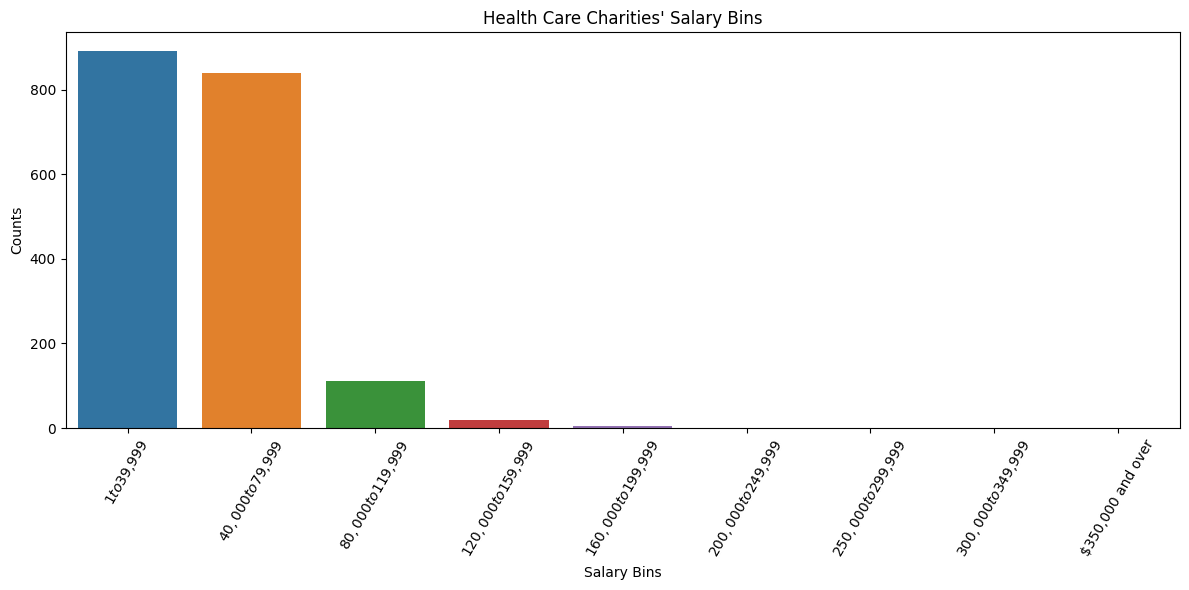

In [100]:
plt.figure(figsize=(12, 6))
chart = sns.barplot(data=salary_sum_dict, x="salary_bins", y="salary_bin_counts")
chart.set_xticklabels(chart.get_xticklabels(), rotation=60)
plt.title("Health Care Charities' Salary Bins")
plt.xlabel("Salary Bins")
plt.ylabel("Counts")
plt.tight_layout()
plt.savefig("similar_revenue_salary_bins_counts")
plt.show()

In [169]:
array_of_top_salaries = [0,0,0,0,0,0,0,0,0]
for salary_list in salary_array_0:
    for i in range(1,10):
        if salary_list[-i] != 0:
            array_of_top_salaries[10-i] += 1
            break

In [170]:
array_of_top_salaries

[0, 3, 140, 81, 18, 5, 0, 0, 0]

In [94]:
Counter(index_of_top_salaries)

Counter({2: 140, 3: 81, 4: 18, 5: 5, 1: 3})

In [97]:
top_salaries = [3, 140, 81, 18, 5, 0, 0, 0, 0]

top_salary_dict = {
    "salary_bin_counts": top_salaries,
    "salary_bins": ["$1 to $39,999", "$40,000 to $79,999", "$80,000 to $119,999", "$120,000 to $159,999", "$160,000 to $199,999", "$200,000 to $249,999", "$250,000 to $299,999", "$300,000 to $349,999", "$350,000 and over"]
}

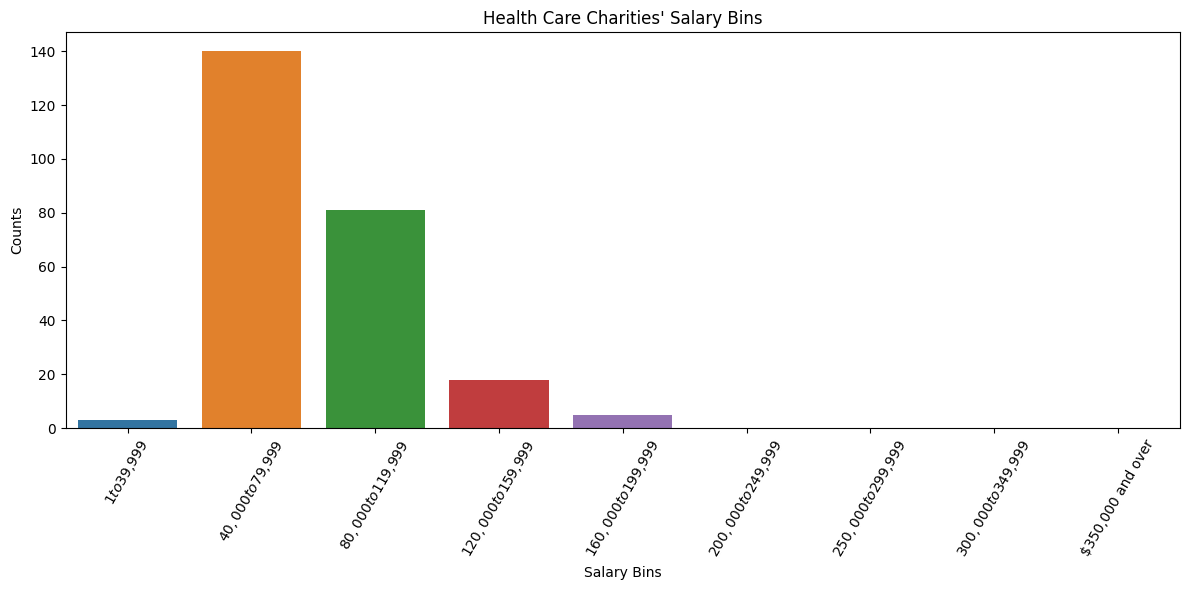

In [101]:
plt.figure(figsize=(12, 6))
chart = sns.barplot(data=top_salary_dict, x="salary_bins", y="salary_bin_counts")
chart.set_xticklabels(chart.get_xticklabels(), rotation=60)
plt.title("Health Care Charities' Salary Bins")
plt.xlabel("Salary Bins")
plt.ylabel("Counts")
plt.tight_layout()
plt.savefig("similar_revenue_top_salary_bins_counts")
plt.show()

In [95]:
dir(Counter)

['__add__',
 '__and__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__init__',
 '__init_subclass__',
 '__ior__',
 '__isub__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__missing__',
 '__module__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__ror__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '_keep_positive',
 'clear',
 'copy',
 'elements',
 'fromkeys',
 'get',
 'items',
 'keys',
 'most_common',
 'pop',
 'popitem',
 'setdefault',
 'subtract',
 'total',
 'update',
 'values']

## Bar Plot of Percentage of Revenue that goes towards Compensation

In [154]:
sensible_percents = df_copy[(df_copy["0.Percent Revenue to Compensation"] <= 100) & (df_copy["BN/Registration number"] != "124072513RR0010")]

In [155]:
df_copy[df_copy["0.Total Revenue"] <= 1000]

,Unnamed: 0,BN/Registration number,Reporting Period List,0.Total Compensation,0.Salary,0.Ongoing Programs,0.Revenue,0.Expenses,1.Total Compensation,1.Salary,...,0.Reporting Date,1.Reporting Date,2.Reporting Date,3.Reporting Date,4.Reporting Date,0.All Employees,0.Average Salary,0.Percent Revenue to Compensation,0.Revenue to Compensation Bins,0.Ratio Revenue to Compensation
13,59,824882849RR0001,2021-06-30\n2020-06-30\n2019-06-30\n2018-06-30...,"{'Professional and consulting fees': nan, 'Tot...",{},Ongoing programs:,"{'Receipted donations': 12.0, 'Non-receipted d...","{'Charitable programs': 155.0, 'Management and...","{'Professional and consulting fees': nan, 'Tot...",{},...,2021-06-30,2020-06-30,2019-06-30,2018-06-30,2017-06-30,NaN,NaN,NaN,NaN,NaN
22,102,760241133RR0001,2021-12-31\n2020-12-31,"{'Professional and consulting fees': nan, 'Tot...",{},Ongoing programs: \n\t\n\tDespite Covid mandat...,"{'Receipted donations': 0.0, 'Non-receipted do...","{'Charitable programs': nan, 'Management and a...","{'Total compensation for all positions': nan, ...",{},...,2021-12-31,2020-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,153,781915293RR0001,2021-12-31\n2020-12-31\n2019-12-31\n2018-12-31...,"{'Total compensation for all positions': nan, ...",{},Ongoing programs: \n\t\n\tWe advanced educatio...,"{'Receipted donations': 100.0, 'Non-receipted ...","{'Charitable programs': nan, 'Management and a...","{'Professional and consulting fees': nan, 'Tot...",{},...,2021-12-31,2020-12-31,2019-12-31,2018-12-31,2017-12-31,NaN,NaN,NaN,NaN,NaN
74,319,856467881RR0001,2021-12-31\n2020-12-31\n2019-12-31\n2018-12-31...,"{'Professional and consulting fees': nan, 'Tot...",{},Ongoing programs: \n\t\n\tTO ENSURE HIV/AIDS O...,"{'Receipted donations': 0.0, 'Non-receipted do...","{'Charitable programs': 8285.0, 'Management an...","{'Professional and consulting fees': nan, 'Tot...",{},...,2021-12-31,2020-12-31,2019-12-31,2018-12-31,2017-12-31,NaN,NaN,NaN,NaN,NaN
95,415,747732923RR0001,2021-12-31\n2020-12-31,"{'Professional and consulting fees': nan, 'Tot...",{},Ongoing programs:,"{'Receipted donations': 0.0, 'Non-receipted do...","{'Charitable programs': 0.0, 'Management and a...","{'Professional and consulting fees': nan, 'Tot...",{},...,2021-12-31,2020-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5903,28071,789047487RR0001,2021-12-31\n2020-12-31\n2019-12-31\n2018-12-31,"{'Total compensation for all positions': nan, ...",{},Ongoing programs: \n\t\n\tFUND RAISING EVENTS ...,"{'Receipted donations': 145.0, 'Non-receipted ...","{'Charitable programs': 9000.0, 'Management an...","{'Total compensation for all positions': nan, ...",{},...,2021-12-31,2020-12-31,2019-12-31,2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN
5906,28085,831996038RR0001,2021-11-04\n2020-11-04\n2019-11-04\n2018-11-04...,"{'Total compensation for all positions': nan, ...",{},Ongoing programs:,"{'Receipted donations': 0.0, 'Non-receipted do...","{'Charitable programs': 0.0, 'Management and a...","{'Total compensation for all positions': nan, ...",{},...,2021-11-04,2020-11-04,2019-11-04,2018-11-04,2017-11-04,NaN,NaN,NaN,NaN,NaN
5930,28191,848681946RR0001,2021-12-31,"{'Professional and consulting fees': nan, 'Tot...",{},Ongoing programs: \n\t\n\tPROVIDE PALLIATIVE C...,"{'Receipted donations': 50.0, 'Non-receipted d...","{'Charitable programs': 0.0, 'Management and a...","{'Professional and consulting fees': nan, 'Tot...",NaN,...,2021-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5959,28313,788218519RR0001,2021-12-31\n2020-12-31\n2019-12-31\n2018-12-31,"{'Professional and consulting fees': nan, 'Tot...",{},Ongoing programs: \n\t\n\tPASSIVE ON-LINE FUND...,"{'Receipted donations': 768.0, 'Non-receipted ...","{'Charitable programs': 6165.0, 'Management an...","{'Part-time employees': nan, 'Professional and...",{},...,2021-12-31,2020-12-31,2019-12-31,2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot: xlabel='0.Total Revenue', ylabel='0.Percent Revenue to Compensation'>

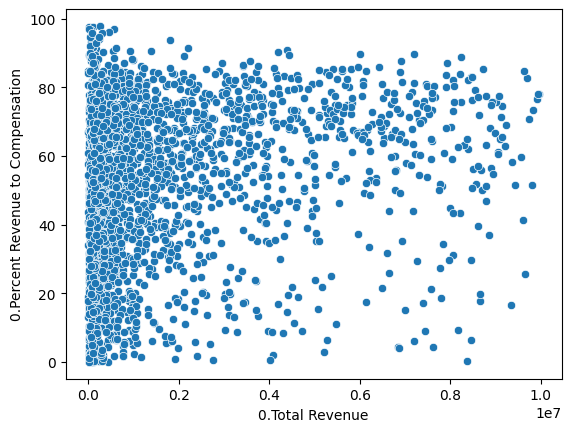

In [159]:
sns.scatterplot(data=sensible_percents[sensible_percents["0.Total Revenue"] < 10000000], x="0.Total Revenue", y="0.Percent Revenue to Compensation")

In [146]:
df_copy["0.Percent Revenue to Compensation"].mean()

63.31857776406308

In [136]:
df_copy[["BN/Registration number", "0.Total Compensation Value", "0.Total Revenue"]][df_copy["0.Percent Revenue to Compensation"] > 100]

,BN/Registration number,0.Total Compensation Value,0.Total Revenue
61,855773453RR0001,20894.0,8773.0
108,850242413RR0001,265783.0,258049.0
755,140416033RR0001,401286.0,167516.0
854,812825735RR0001,23333.0,2503.0
941,823101886RR0001,57228.0,359.0
1547,879935211RR0001,13122.0,7617.0
1648,107661050RR0001,3638121.0,3619433.0
1761,884003401RR0001,20400.0,277.0
1849,145387635RR0001,24793.0,18178.0
1856,118885482RR0001,8226712.0,1665967.0


In [132]:
df_copy["0.Total Compensation Value"][df_copy["0.Percent Revenue to Compensation"] > 100]

61         20894.0
108       265783.0
755       401286.0
854        23333.0
941        57228.0
1547       13122.0
1648     3638121.0
1761       20400.0
1849       24793.0
1856     8226712.0
2027       46168.0
2028      327161.0
2121        3513.0
2130       20508.0
2333      104120.0
2468     1210485.0
2617      125319.0
3081       30741.0
3140       17316.0
3176         111.0
3290        4055.0
3437      498593.0
3445     1005333.0
3463        4588.0
3472       47262.0
3634        6207.0
3814       29940.0
4002       48556.0
4048     8248382.0
4101      138900.0
4109       14000.0
4182      136269.0
4209      852296.0
4395       19588.0
4563    14997603.0
4642     1191037.0
4682      308329.0
4699       42634.0
4749       21151.0
5175       46536.0
5576       32279.0
5641       48269.0
5683       73979.0
5688       24000.0
5843        1200.0
6122      206085.0
Name: 0.Total Compensation Value, dtype: float64

In [133]:
df_copy["0.Total Revenue"][df_copy["0.Percent Revenue to Compensation"] > 100]

61         8773.0
108      258049.0
755      167516.0
854        2503.0
941         359.0
1547       7617.0
1648    3619433.0
1761        277.0
1849      18178.0
1856    1665967.0
2027       5991.0
2028     310609.0
2121       2021.0
2130      18873.0
2333      91928.0
2468    1117599.0
2617     117340.0
3081       5944.0
3140      15983.0
3176         11.0
3290       2597.0
3437     204663.0
3445     964925.0
3463       1510.0
3472      12918.0
3634       5127.0
3814      19414.0
4002      47906.0
4048    7870460.0
4101     121497.0
4109       5245.0
4182     111511.0
4209     758507.0
4395      15830.0
4563    1533976.0
4642    1155758.0
4682      24632.0
4699      35000.0
4749      18166.0
5175      43584.0
5576      12535.0
5641      30569.0
5683      67053.0
5688      14603.0
5843        557.0
6122     179931.0
Name: 0.Total Revenue, dtype: float64

In [123]:
df_copy["0.Revenue to Compensation Bins"]= pd.qcut(df_copy["0.Ratio Revenue to Compensation"], q=[0, .25, .5, .75, 1.])

In [124]:
df_copy["0.Revenue to Compensation Bins"]

0       (0.706, 159.409]
1       (0.706, 159.409]
2         (0.393, 0.574]
3         (0.574, 0.706]
4        (-0.001, 0.393]
              ...       
6145    (0.706, 159.409]
6146      (0.393, 0.574]
6147     (-0.001, 0.393]
6148      (0.574, 0.706]
6149      (0.574, 0.706]
Name: 0.Revenue to Compensation Bins, Length: 6150, dtype: category
Categories (4, interval[float64, right]): [(-0.001, 0.393] < (0.393, 0.574] < (0.574, 0.706] < (0.706, 159.409]]

<AxesSubplot: ylabel='Frequency'>

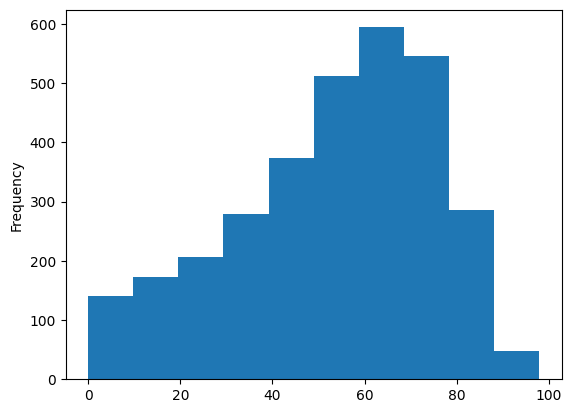

In [162]:
sensible_percents["0.Percent Revenue to Compensation"].plot(kind='hist')

In [126]:
df_copy["0.Ratio Revenue to Compensation"]

0       0.757982
1       0.767264
2       0.530308
3       0.649534
4       0.355376
          ...   
6145    0.802874
6146    0.489387
6147    0.088321
6148    0.609426
6149    0.584432
Name: 0.Ratio Revenue to Compensation, Length: 6150, dtype: float64

StopIteration: 

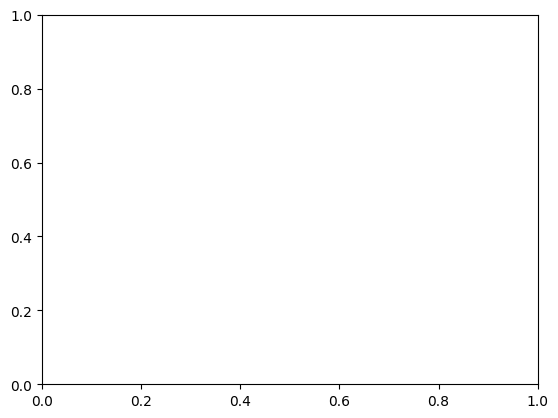

In [128]:
sns.histplot(data=df_copy["0.Percent Revenue to Compensation"], x=df_copy["0.Percent Revenue to Compensation"].value_counts())

# CODE THAT DIDNT GO INTO THE EXPLORATORY REPORT

<AxesSubplot: xlabel='0.Full Time Employees', ylabel='0.Total Revenue'>

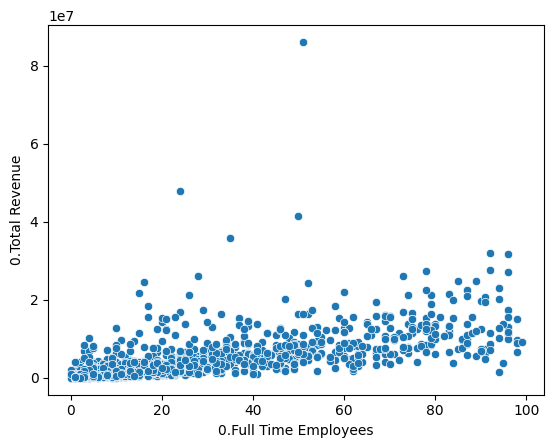

In [166]:
df_full_time = df_copy[df_copy["0.Full Time Employees"] < 100]
sns.scatterplot(data=df_full_time, x="0.Full Time Employees", y="0.Total Revenue")

<AxesSubplot: xlabel='0.Total Revenue', ylabel='0.Average Salary'>

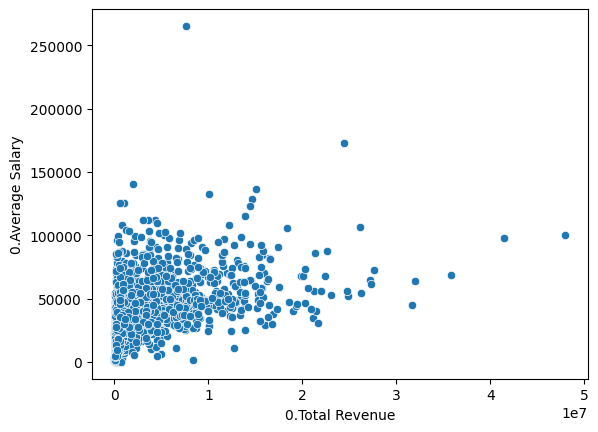

In [167]:
sns.scatterplot(data=df_full_time, x="0.Total Revenue", y="0.Average Salary")

In [168]:
df_copy.columns

Index(['Unnamed: 0', 'BN/Registration number', 'Reporting Period List',
       '0.Total Compensation', '0.Salary', '0.Ongoing Programs', '0.Revenue',
       '0.Expenses', '1.Total Compensation', '1.Salary', '1.Ongoing Programs',
       '1.Revenue', '1.Expenses', '2.Total Compensation', '2.Salary',
       '2.Ongoing Programs', '2.Revenue', '2.Expenses', '3.Total Compensation',
       '3.Salary', '3.Ongoing Programs', '3.Revenue', '3.Expenses',
       '4.Total Compensation', '4.Salary', '4.Ongoing Programs', '4.Revenue',
       '4.Expenses', '_id.$oid', '0.SalaryArray', '1.SalaryArray',
       '2.SalaryArray', '3.SalaryArray', '4.SalaryArray',
       '0.Total Compensation Value', '0.Full Time Employees',
       '0.Part Time Employees', '0.Consulting Fees',
       '1.Total Compensation Value', '1.Full Time Employees',
       '1.Part Time Employees', '1.Consulting Fees',
       '2.Total Compensation Value', '2.Full Time Employees',
       '2.Part Time Employees', '2.Consulting Fees',
     

In [544]:
for province in list(df.province.unique()):
    province_df = df[df.province == province]
    print(province)
    print(province_df[["name", "BN/Registration number"]][province_df["0.Government Funding"] == province_df["0.Government Funding"].max()])
    print("\n\n")

QUEBEC
                                                   name BN/Registration number
1032  Centre Intégré Universitaire de Santé et de Se...        845739747RR0001



ALBERTA
                       name BN/Registration number
72  Alberta Health Services        124072513RR0010



NEW BRUNSWICK
                                                   name BN/Registration number
4397  Regional Health Authority B/Régie régionale de...        809872294RR0001



ONTARIO
                           name BN/Registration number
5779  UNIVERSITY HEALTH NETWORK        119259505RR0001



BRITISH COLUMBIA
                         name BN/Registration number
2352  FRASER HEALTH AUTHORITY        887612463RR0001



NOVA SCOTIA
                                     name BN/Registration number
3918  NOVA SCOTIA HEALTH AUTHORITY (NSHA)        886143213RR0001



SASKATCHEWAN
                               name BN/Registration number
4821  SASKATCHEWAN HEALTH AUTHORITY        895830180RR0001



MANITOBA
         

In [545]:
for province in list(df.province.unique()):
    province_df = df[df.province == province]
    print(province)
    print(province_df[["name", "BN/Registration number"]][province_df["0.Total Revenue"] == province_df["0.Total Revenue"].max()])
    print("\n\n")

QUEBEC
                                                   name BN/Registration number
1032  Centre Intégré Universitaire de Santé et de Se...        845739747RR0001



ALBERTA
                       name BN/Registration number
72  Alberta Health Services        124072513RR0010



NEW BRUNSWICK
                                                   name BN/Registration number
4397  Regional Health Authority B/Régie régionale de...        809872294RR0001



ONTARIO
                           name BN/Registration number
5779  UNIVERSITY HEALTH NETWORK        119259505RR0001



BRITISH COLUMBIA
                         name BN/Registration number
2352  FRASER HEALTH AUTHORITY        887612463RR0001



NOVA SCOTIA
                                     name BN/Registration number
3918  NOVA SCOTIA HEALTH AUTHORITY (NSHA)        886143213RR0001



SASKATCHEWAN
                               name BN/Registration number
4821  SASKATCHEWAN HEALTH AUTHORITY        895830180RR0001



MANITOBA
         

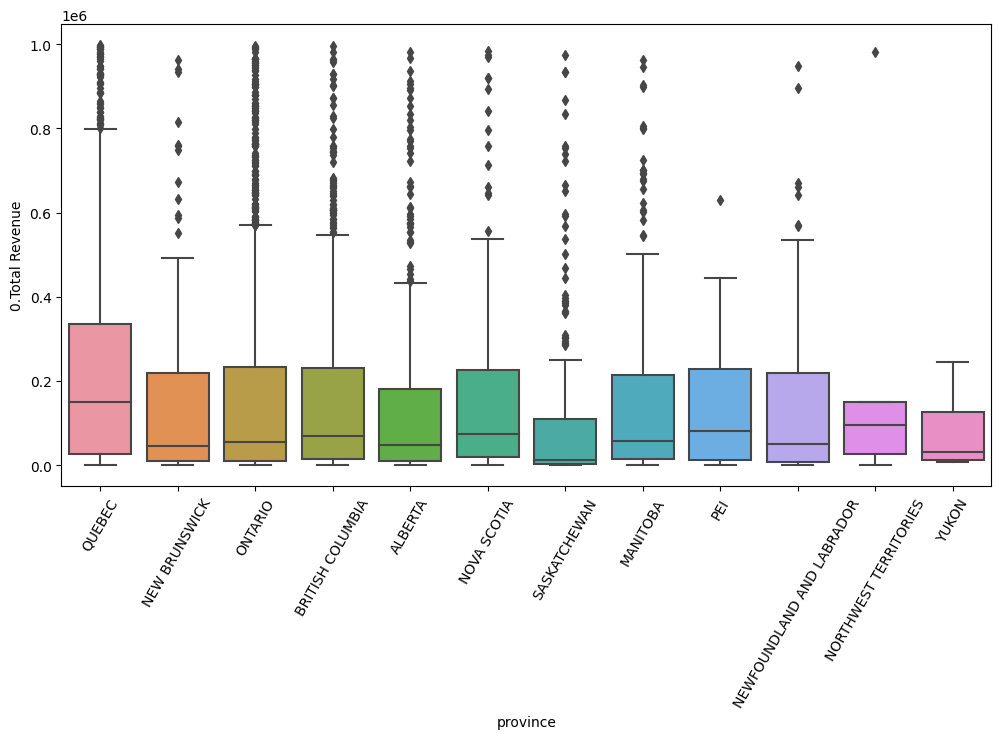

In [546]:
# Removing Additional Outliers for this plot only
revenue_province_box_df = df[df["0.Total Revenue"] < 1e6]
plt.figure(figsize=(12, 6))
chart = sns.boxplot(data=revenue_province_box_df, x="province", y="0.Total Revenue")
chart.set_xticklabels(chart.get_xticklabels(), rotation=60)
plt.show()

In [547]:
chart.get_xticklabels()

[Text(0, 0, 'QUEBEC'),
 Text(1, 0, 'NEW BRUNSWICK'),
 Text(2, 0, 'ONTARIO'),
 Text(3, 0, 'BRITISH COLUMBIA'),
 Text(4, 0, 'ALBERTA'),
 Text(5, 0, 'NOVA SCOTIA'),
 Text(6, 0, 'SASKATCHEWAN'),
 Text(7, 0, 'MANITOBA'),
 Text(8, 0, 'PEI'),
 Text(9, 0, 'NEWFOUNDLAND AND LABRADOR'),
 Text(10, 0, 'NORTHWEST TERRITORIES'),
 Text(11, 0, 'YUKON')]

In [548]:
df.province.nunique()

12

In [549]:
health_authority_names = []
for name in df.name:
    if "health authority" in name.lower():
        health_authority_names.append(name)

In [550]:
health_authority_df = df[df.name.isin(health_authority_names)]

In [551]:
health_authority_df.province.value_counts()

BRITISH COLUMBIA             6
MANITOBA                     4
NEWFOUNDLAND AND LABRADOR    3
NEW BRUNSWICK                2
NOVA SCOTIA                  1
SASKATCHEWAN                 1
ONTARIO                      1
Name: province, dtype: int64

In [552]:
health_authority_df.describe()

,Unnamed: 0_x,0.Total Compensation Value,0.Full Time Employees,0.Part Time Employees,0.Consulting Fees,1.Total Compensation Value,1.Full Time Employees,1.Part Time Employees,1.Consulting Fees,2.Total Compensation Value,...,3.Total Expenses,4.Total Expenses,Unnamed: 0_y,0.All Employees,0.Average Salary,0.Percent Revenue to Compensation,0.Ratio Revenue to Compensation,0.Government Funding,0.Ratio Government Funding to Total Revenue,0.Top Salary Index
count,18.000000,1.700000e+01,17.000000,16.000000,1.400000e+01,1.700000e+01,17.000000,16.000000,1.400000e+01,1.700000e+01,...,1.600000e+01,1.400000e+01,18.000000,16.000000,16.000000,17.000000,17.000000,1.800000e+01,18.000000,17.000000
mean,19064.222222,1.042765e+09,7562.941176,7052.125000,2.209911e+07,8.601879e+08,7395.000000,7078.312500,2.001334e+07,9.475882e+08,...,1.467753e+09,1.365592e+09,52317.555556,14228.625000,73199.705131,56.829847,0.568298,1.615068e+09,0.881013,7.470588
std,6676.346989,9.625464e+08,6600.239044,7424.833267,5.612634e+07,8.733930e+08,6399.641211,7074.882394,5.372552e+07,8.201041e+08,...,1.413967e+09,1.376288e+09,21530.594345,13414.341206,13702.400172,14.541490,0.145415,1.583869e+09,0.224720,1.230734
min,6710.000000,4.460782e+06,87.000000,20.000000,3.406450e+05,2.008634e+06,57.000000,38.000000,3.674320e+05,4.127134e+06,...,2.934000e+03,2.084000e+03,14064.000000,107.000000,41689.551402,21.298341,0.212983,0.000000e+00,0.000000,3.000000
25%,14021.500000,1.757986e+08,1681.000000,941.500000,9.323828e+05,1.631793e+08,1721.000000,929.500000,8.804540e+05,1.816801e+08,...,2.219524e+08,2.080144e+08,36059.500000,2430.500000,67751.029327,48.438138,0.484381,2.279156e+08,0.922785,7.000000
50%,18614.500000,8.907088e+08,5155.000000,4832.500000,4.681772e+06,7.284025e+08,5010.000000,4793.500000,3.946604e+06,8.950263e+08,...,1.067880e+09,1.023217e+09,50415.500000,10620.500000,74517.637711,61.320737,0.613207,1.116359e+09,0.939465,8.000000
75%,23465.750000,1.776195e+09,11760.000000,14621.250000,1.049601e+07,1.402207e+09,11025.000000,13881.750000,8.070153e+06,1.605964e+09,...,2.371814e+09,2.183303e+09,63921.000000,24940.000000,82198.027902,69.223333,0.692233,2.776338e+09,0.957478,8.000000
max,28809.000000,3.292905e+09,20779.000000,20272.000000,2.142193e+08,3.172110e+09,20989.000000,19211.000000,2.050331e+08,2.880882e+09,...,4.147882e+09,4.025351e+09,84755.000000,40160.000000,96193.515909,72.720399,0.727204,4.669499e+09,0.994873,8.000000


### Hospitals?

In [574]:
actual_hospitals = []
for name in df.name:
    if "hospital" in name.lower() and "fund" not in name.lower() and "foundation" not in name.lower() and "auxiliary" not in name.lower() and "auxilliary" not in name.lower() and 'auxiliaires' not in name.lower() and 'fondation' not in name.lower() and "volunteer" not in name.lower():
        actual_hospitals.append(name)

In [575]:
len(actual_hospitals)

134

In [576]:
hospital_df = df[df.name.isin(actual_hospitals)]

In [577]:
hospital_df.columns

Index(['Unnamed: 0_x', 'BN/Registration number', 'Reporting Period List',
       '0.Total Compensation', '0.Salary', '0.Ongoing Programs', '0.Revenue',
       '0.Expenses', '1.Total Compensation', '1.Salary', '1.Ongoing Programs',
       '1.Revenue', '1.Expenses', '2.Total Compensation', '2.Salary',
       '2.Ongoing Programs', '2.Revenue', '2.Expenses', '3.Total Compensation',
       '3.Salary', '3.Ongoing Programs', '3.Revenue', '3.Expenses',
       '4.Total Compensation', '4.Salary', '4.Ongoing Programs', '4.Revenue',
       '4.Expenses', '_id.$oid', '0.SalaryArray', '1.SalaryArray',
       '2.SalaryArray', '3.SalaryArray', '4.SalaryArray',
       '0.Total Compensation Value', '0.Full Time Employees',
       '0.Part Time Employees', '0.Consulting Fees',
       '1.Total Compensation Value', '1.Full Time Employees',
       '1.Part Time Employees', '1.Consulting Fees',
       '2.Total Compensation Value', '2.Full Time Employees',
       '2.Part Time Employees', '2.Consulting Fees',
   

<AxesSubplot: ylabel='Frequency'>

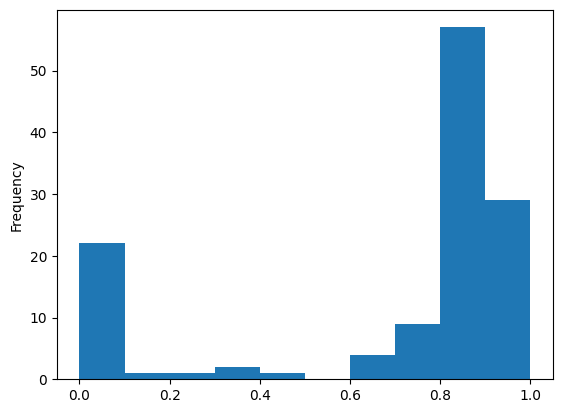

In [578]:
hospital_df["0.Ratio Government Funding to Total Revenue"][hospital_df['0.Ratio Government Funding to Total Revenue'].notna()].plot(kind="hist")

In [579]:
hospital_df.name[hospital_df["0.Ratio Government Funding to Total Revenue"] < 0.5]

434     ASSOCIATION DES BENEVOLES DU CENTRE D'ACCUEIL ...
1539    CHILDREN'S HOSPITAL OF EASTERN ONTARIO RESEARC...
2189     Friends of the Red Deer Regional Hospital Centre
2365                FRIENDS OF FOX CREEK HOSPITAL SOCIETY
2474    GLACE BAY (HEALTH CARE CORP) HOSPITAL GIFT CORNER
3152    Les Bénévoles du centre hospitalier régional d...
3263                             LAKESHORE HOSPITAL GUILD
3606               MATTHEWS MEMORIAL HOSPITAL ASSOCIATION
3673                           MITCHELL MEMORIAL HOSPITAL
3689                                 MOUNT SINAI HOSPITAL
3957    Ordre souverain militaire hospitalier de St-Je...
3967    Ottawa Hospital Research Institute/Institut de...
4234    PERCY E. MOORE HOSPITAL PALLIATIVE CARE ROOM I...
4293      PRESENCE AMIE DU CENTRE HOSPITALIER FLEURY INC.
4495    RELIGIOUS HOSPITALLERS OF SAINT JOSEPH OF THE ...
4887    SERVICE BENEVOLE HOSPITALIER DE L'HOTEL-DIEU D...
4892    SERVICES BÉNÉVOLES DU CENTRE HOSPITALIER DE VE...
5018    SOVERE

In [580]:
hospitals = []
for name in df.name:
    if "hospital" in name.lower():
        hospitals.append(name)

In [581]:
len(hospitals)

316

In [583]:
any_hospital_df = df[df.name.isin(hospitals)]

<AxesSubplot: ylabel='Frequency'>

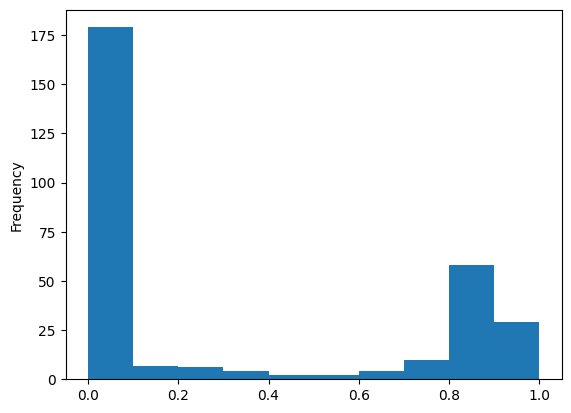

In [584]:
any_hospital_df["0.Ratio Government Funding to Total Revenue"].plot(kind='hist')

In [585]:
hospital_df["0.Government Funding"].isna().sum()

8